In [9]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

Here is the data on hourly rainfall used in class (values are in mm):

In [5]:
rain = np.array([ 17.,  99.,  79.,  24.,  32.,  45.,  93.,  83., 113.,  32.,   3.,
       114.,  71.,  98.,  56.,  31.,  95.,  31.,  76.,  83.,  70., 107.,
        23.,  40., 168.,  43.,  43.,  28.,  20.,  49.,  26.,  32.,  10.,
        58.,  52.,  35.,  81., 124.,  28.,  46.,  25., 120.,  24.,  17.,
        57.,  96.,  59., 100.,  33.,  74.,  27.,  33.,  33.,  35.,  76.,
       104.,  31.,  24.,  33.,  24.,  73.,  34.,  50.,  53.,  50.,  33.,
       106., 125.,  44.,  94.,  35.,  54.])

In class, we fit a Gamma distribution by maximum likelihood to this data, as follows:

In [6]:
from scipy.stats import gamma

def logL(theta, k):
    lpdfs = gamma.logpdf(rain, a=k, scale=theta) # "a" is the shape parameter here
    return np.sum(lpdfs)

from scipy.optimize import minimize
max_L = minimize(lambda x: -logL(*x), x0=(24, 1.8))
mle_theta, mle_k = max_L['x']
print(f"MLE estimates: theta = {mle_theta:.2f}, k = {mle_k:.2f}")

MLE estimates: theta = 21.18, k = 2.71


**Today:**

1. Is the Gamma distribution a good model for the data?
2. How far off are our estimates of the parameters?

## 1. Write a function to simulate from the model.

Our model is:
$$X_i \sim \text{Gamma}(\theta, k),$$
for $0 \le i \le 72$, and $\theta$ and $k$ are our MLEs above.
Write a function, `sim_rain(theta, k)`, that will return an array of 72 new values of hourly rainfall,
simulated under this model, with the parameters $\theta$ and $k$ as arguments.
The function should round the resulting values, so they look like the real data.
Use it to simulate a dataset.

## 2. See if simulated datasets look like the real dataset.

Do this by making plots of (a) the real data, and (b) at least 5 simulated datasets,
mixed together, and seeing if you can tell which one is the real data.
Try different plot types: histogram, and scatter.

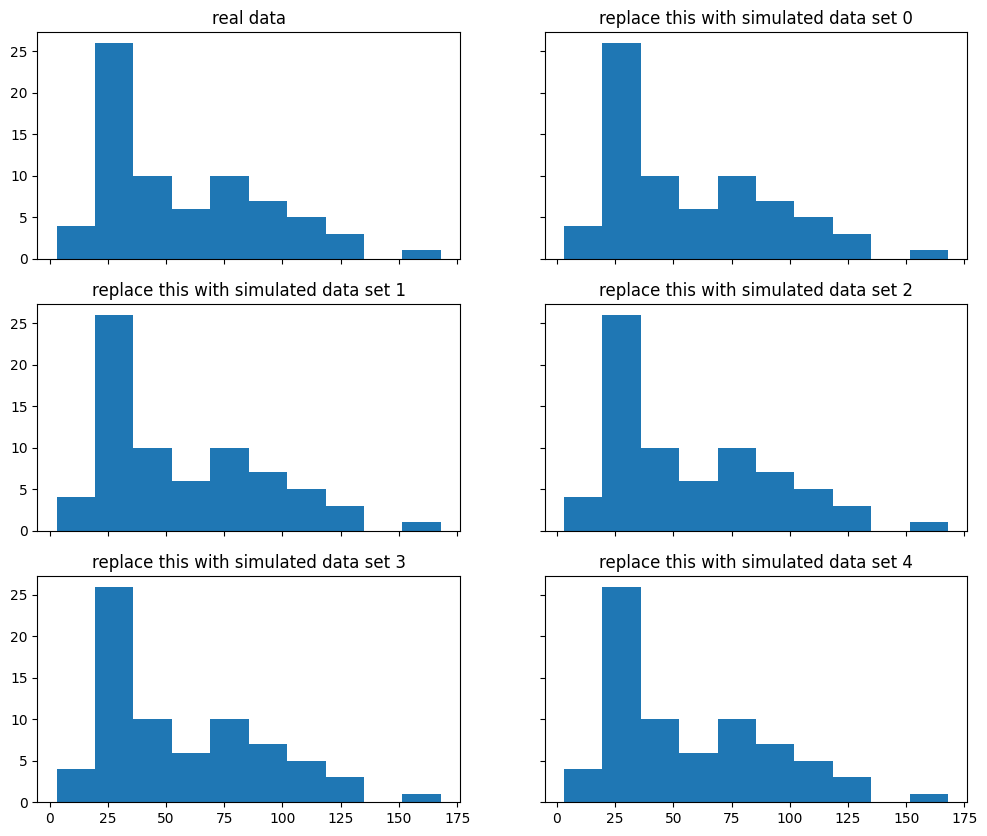

In [14]:
# code for plotting a bunch of  plots together:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(12, 10))
ax = axes[0][0]
ax.hist(rain)
ax.set_title("real data")
for k, ax in enumerate(axes.flatten()[1:]):
    ax.hist(rain)
    ax.set_title(f"replace this with simulated data set {k}")

## 3. Sanity check

You shouldn't have been able to really tell which was the real one in (2).
To verify that this procedure works, do the same thing,
but simulating data using your function with very different parameter values.

## 4. Put the MLE code in a function.

Take our code from above that we used to find the maximum likelihood estimates of $\theta$ and $k$
and put it in a function that returns the parameter estimates.
Apply it to `rain` and check you get the same values as above.

## 5. Apply the MLE function to at least 100 simulated datasets.

The simulations should be done using the estimates we got from the real data.
Then, make histograms of the resulting estimates for $\theta$ and $k$.
Put vertical lines at the true values (i.e., the values you used for simulation).

## 6. Write a conclusion!

A few sentences that describe what we've learned here.